# Neural Network: Classification Problem



We will use neural networks to predict the species of iris flowers from data with the following features:

    sepal_length - Continuous variable measured in centimeters.
    sepal_width - Continuous variable measured in centimeters.
    petal_length - Continuous variable measured in centimeters.
    petal_width - Continuous variable measured in centimeters.
    species - Categorical. 2 species of iris flowers, Iris-virginica or Iris-versicolor.


    sepal_length  sepal_width  petal_length  petal_width          species
49           5.7          2.8           4.1          1.3  Iris-versicolor
36           6.7          3.1           4.7          1.5  Iris-versicolor
35           6.0          3.4           4.5          1.6  Iris-versicolor
58           6.7          2.5           5.8          1.8   Iris-virginica
30           5.5          2.4           3.8          1.1  Iris-versicolor
['Iris-versicolor' 'Iris-virginica']


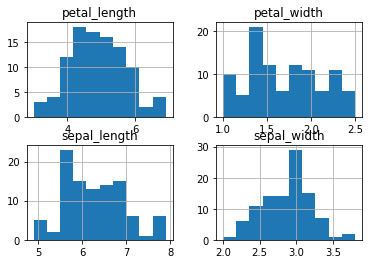

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# Read in dataset
iris = pandas.read_csv("data/iris.csv")

# shuffle rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

# There are 2 species
print(iris.species.unique())

iris.hist()
plt.show()

In [3]:
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)
X_train = X[0:70]
y_train = y[0:70]
X_test = X[70:]
y_test= y[70:]

## Preprocessing Data

### Rescale Data

You can rescale your data using scikit-learn using the MinMaxScaler class.

Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1. This is useful for optimization algorithms like:
* **gradient descent** 
* algorithms that weight inputs like **regression** and **neural networks** 
* algorithms that use distance measures like **K-Nearest Neighbors**.

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.fit_transform(X_test)



In [5]:
print(X_train1[:3])
print(X_test1[:3])


[[ 0.          0.26666667  0.44444444  0.23529412  0.2       ]
 [ 0.          0.6         0.61111111  0.41176471  0.33333333]
 [ 0.          0.36666667  0.77777778  0.35294118  0.4       ]]
[[ 0.          0.88888889  0.45454545  0.79487179  0.6       ]
 [ 0.          0.22222222  0.63636364  0.28205128  0.2       ]
 [ 0.          0.22222222  0.54545455  0.15384615  0.2       ]]


### Data Standardisation

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test1)


print(X_train2[:3])
print(X_test2[:3])

[[ 0.         -0.8521453  -0.21746808 -0.9812035  -0.88964745]
 [ 0.          0.66412748  0.68864892 -0.25077906 -0.41643072]
 [ 0.         -0.39726347  1.59476592 -0.49425387 -0.17982236]]
[[-1.         -8.14710209 -7.30165555 -5.00478089 -2.54590601]
 [-1.         -9.15795061 -6.75249373 -5.62907528 -3.49233947]
 [-1.         -9.15795061 -7.02707464 -5.78514888 -3.49233947]]


# Data Normalisation

Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

This preprocessing can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as **neural networks** and algorithms that use distance measures such as **K-Nearest Neighbors**.

In [7]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
X_train3 = scaler.transform(X_train)
X_test3 = scaler.transform(X_test)

print(X_train3[:3])
print(X_test3[:3])

[[ 0.12928273  0.73691153  0.36199163  0.53005917  0.16806754]
 [ 0.11191537  0.74983298  0.34693765  0.52600224  0.16787306]
 [ 0.11837014  0.71022082  0.40245847  0.53266562  0.18939222]]
[[ 0.09786066  0.72416891  0.27400986  0.59695005  0.18593526]
 [ 0.12925032  0.72380182  0.38775097  0.52992633  0.16802542]
 [ 0.13432806  0.75223713  0.38955137  0.48358101  0.17462648]]


# Binarize Data

It can be useful when you have probabilities that you want to make crisp values. It is also useful when feature engineering and you want to add new features that indicate something meaningful.

In [8]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.5).fit(X_train)

X_train4 = binarizer.transform(X_train)
X_test4 = binarizer.transform(X_test)

print(X_train4[:3])
print(X_test4[:3])

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


# Multi-Layer Perceptron Classifier model

Let's apply this model to our rescale data. The model is fit on train data then prediction is made from the test data set and repot is made comparing the real output to the predicted ones.

In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=4, max_iter = 10000)

In [10]:
mlp.fit(X_train1,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=4, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [11]:
predictions = mlp.predict(X_test1)
print(predictions)
print(y_test)

[0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1]
[0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1]


# how good is our model?

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[18  1]
 [ 1 10]]


In [13]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95        19
          1       0.91      0.91      0.91        11

avg / total       0.93      0.93      0.93        30



True positive (TP) and true negatives (TN) are the observations that are correctly predicted 

False Positives (FP) – When actual class is no and predicted class is yes.

False Negatives (FN) – When actual class is yes but predicted class in no.


Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. 

Accuracy = (TP+TN)/(TP+FP+FN+TN)

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)